In [1]:
pip install seaborn


## import modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


C:\Users\chand\AppData\Local\Temp\ipykernel_7464\3988218246.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## load the dataset

In [3]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk(r'C:\Users\chand\Downloads\TESS\TESS\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')

Dataset is loaded


In [4]:
paths[:5]

['C:\\Users\\chand\\Downloads\\TESS\\TESS\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\chand\\Downloads\\TESS\\TESS\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\chand\\Downloads\\TESS\\TESS\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\chand\\Downloads\\TESS\\TESS\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\chand\\Downloads\\TESS\\TESS\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## create a dataframe
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

speech  label
0  C:\Users\chand\Downloads\TESS\TESS\TESS Toront...  angry
1  C:\Users\chand\Downloads\TESS\TESS\TESS Toront...  angry
2  C:\Users\chand\Downloads\TESS\TESS\TESS Toront...  angry
3  C:\Users\chand\Downloads\TESS\TESS\TESS Toront...  angry
4  C:\Users\chand\Downloads\TESS\TESS\TESS Toront...  angry

In [7]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

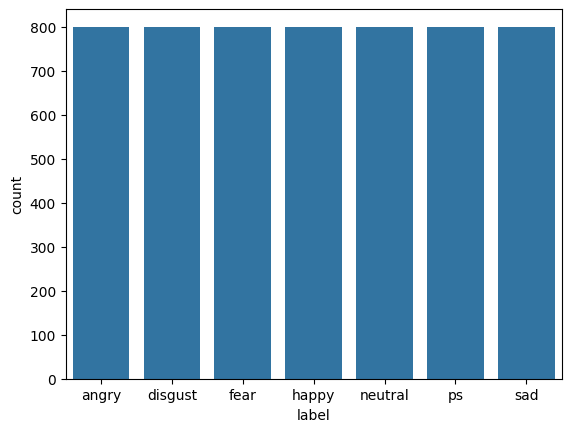

In [8]:
sns.countplot(data=df, x='label')

In [9]:
import matplotlib.pyplot as plt
import librosa.display

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr, color='blue')  # Explicitly set the color
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()


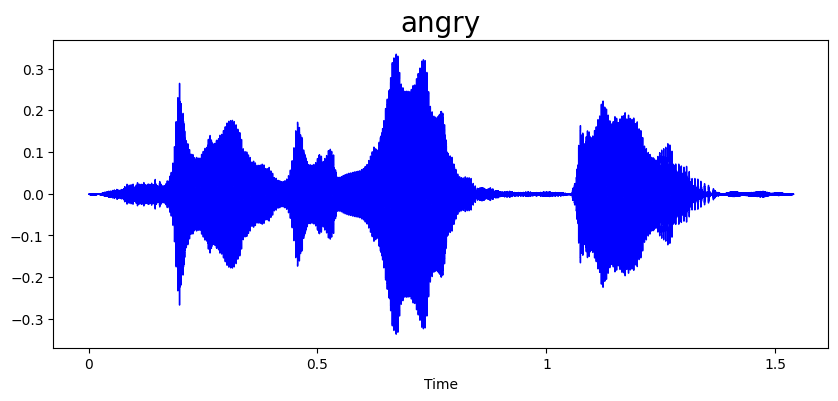

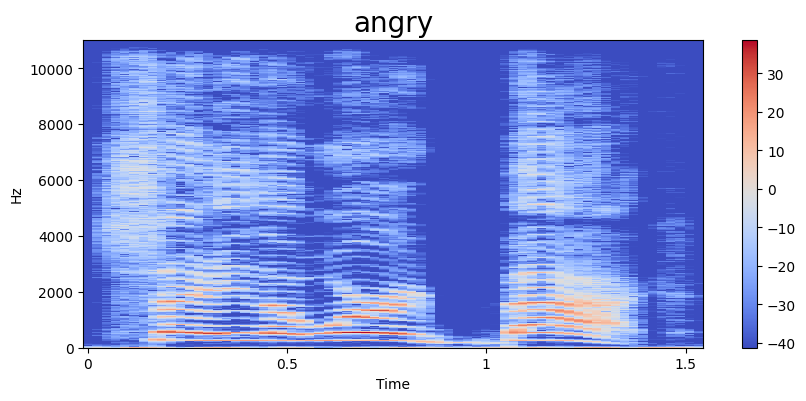

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


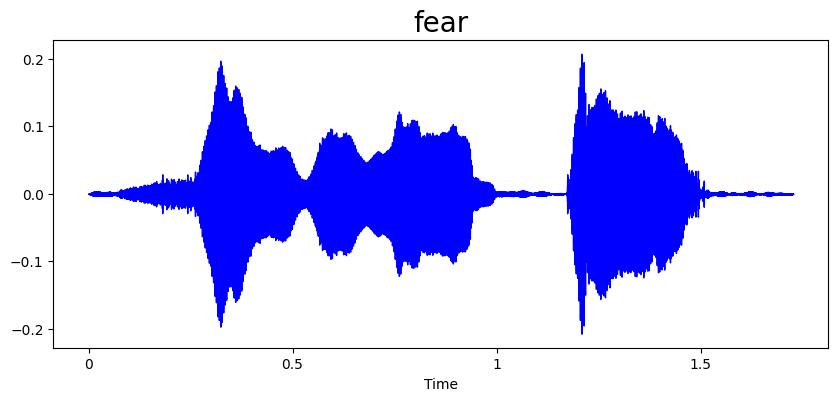

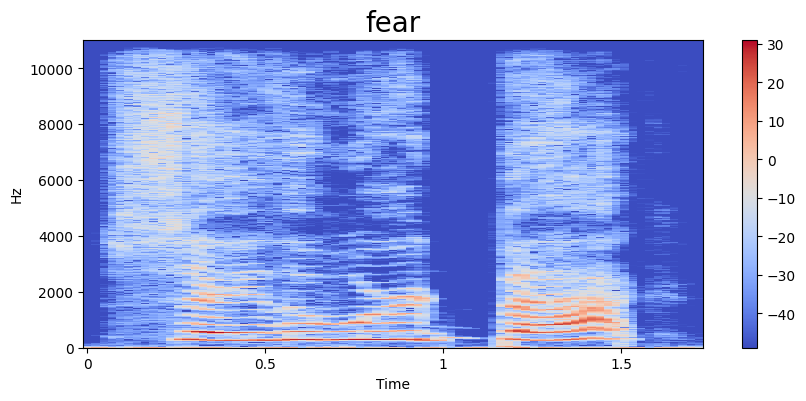

In [11]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


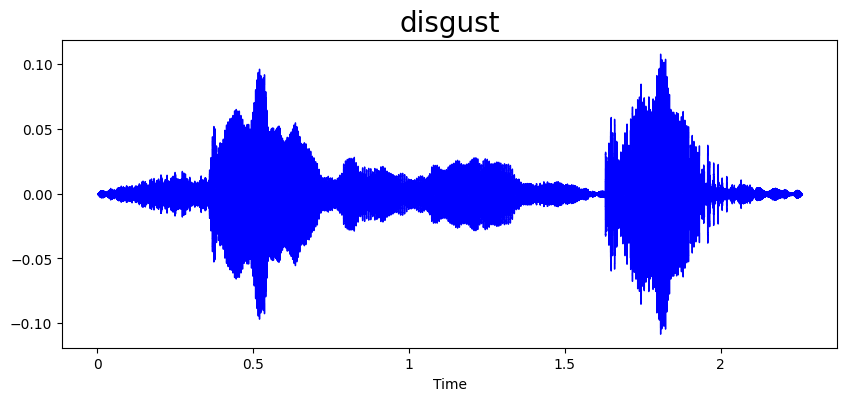

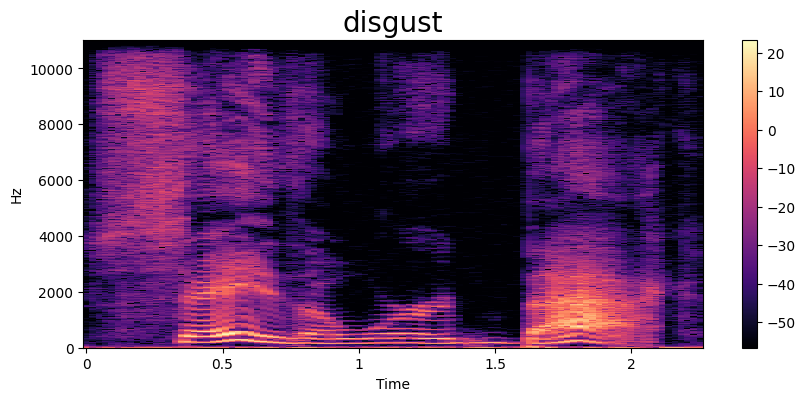

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


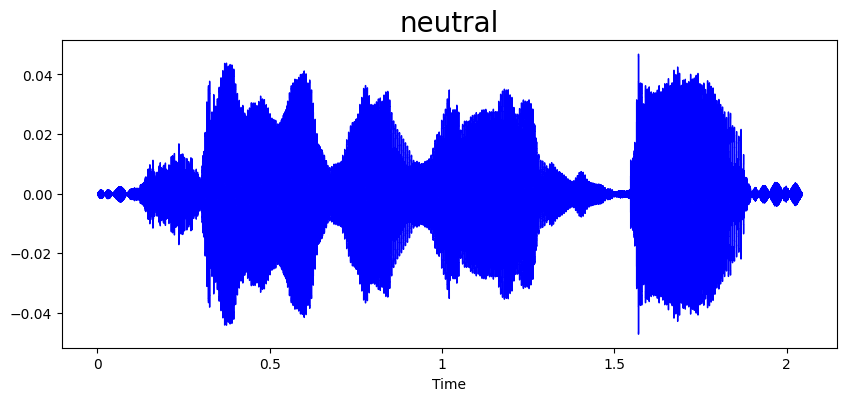

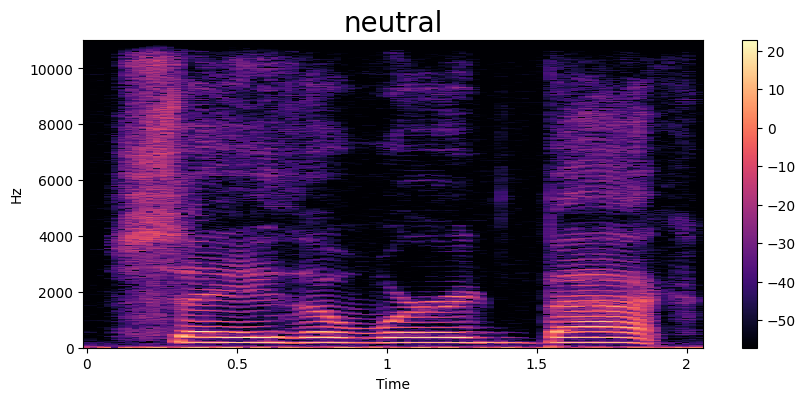

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


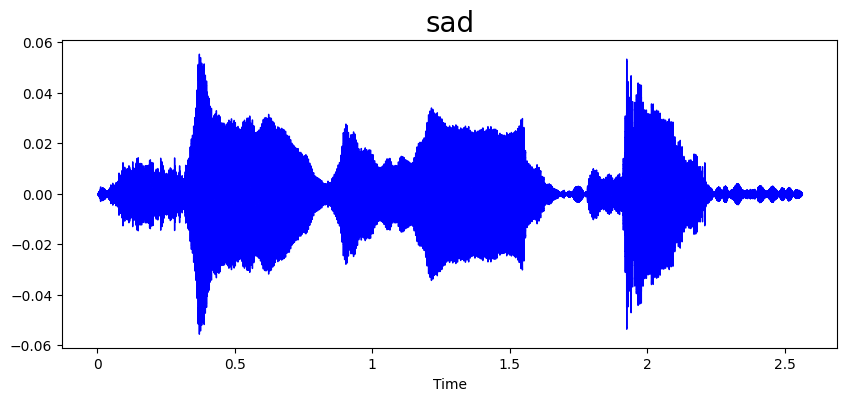

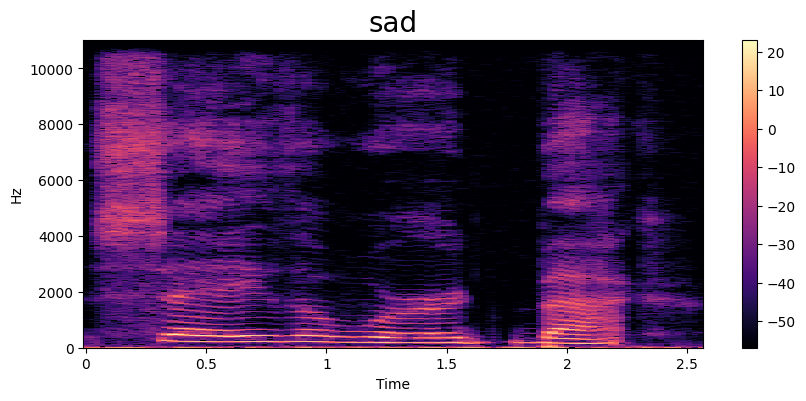

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


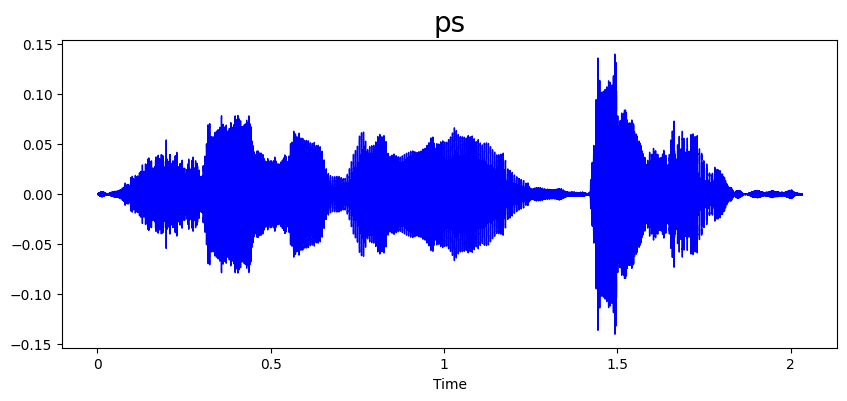

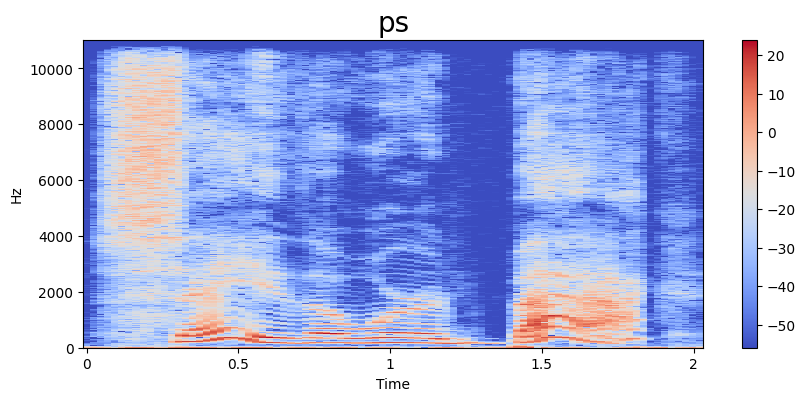

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


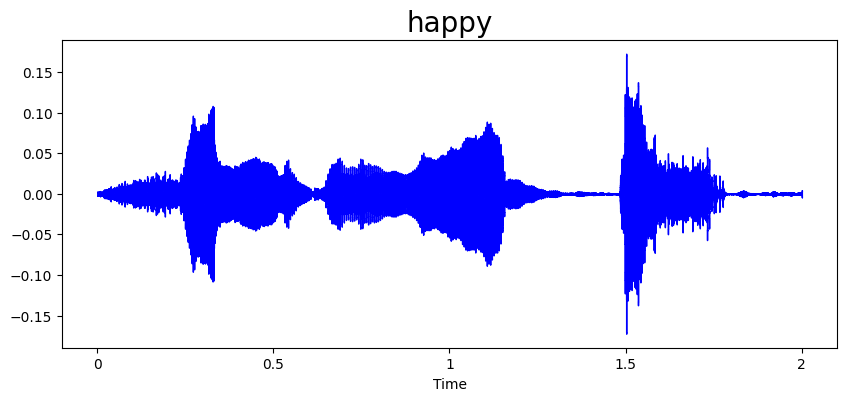

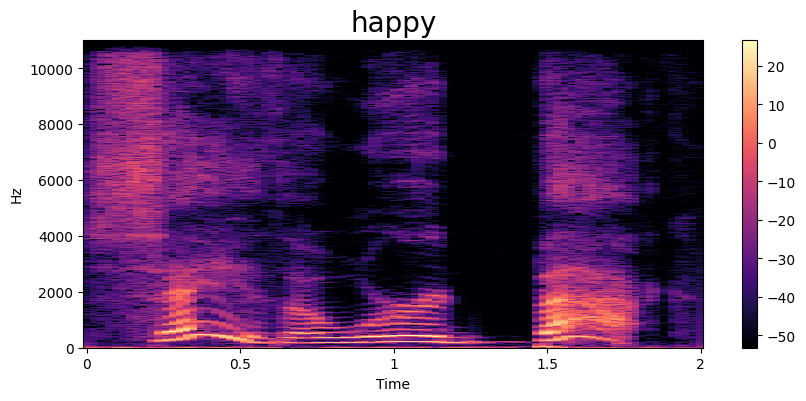

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveform
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


## feature Extraction

In [17]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666927e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09245014e+00,
       -7.21228313e+00, -5.57366252e-01, -1.83255339e+00,  2.02101290e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688060e+00, -7.03765249e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169914e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94721955e-01,  5.11131477e+00,
        9.56873989e+00,  5.45486879e+00,  2.50996351e+00, -1.82390761e+00,
        4.86896229e+00,  9.31392384e+00,  2.08914995e+00, -1.90649140e+00],
      dtype=float32)

In [19]:
x_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))

In [20]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666693, -...
1       [-465.73267, 98.77373, 0.65600806, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550473, -0.21709459,...
3       [-403.46118, 76.32369, -12.531776, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [21]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(5600, 40)

In [22]:
## input split
x=np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [24]:
y=y.toarray()

In [25]:
y.shape

(5600, 7)

## create the LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
   LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [28]:
# Train the model

history = model.fit(x,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.2341 - loss: 1.9021 - val_accuracy: 0.1830 - val_loss: 1.7704
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step - accuracy: 0.4068 - loss: 1.5582 - val_accuracy: 0.3491 - val_loss: 1.5967
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.5203 - loss: 1.2976 - val_accuracy: 0.5000 - val_loss: 1.2955
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.6283 - loss: 1.0237 - val_accuracy: 0.6562 - val_loss: 0.9359
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.7223 - loss: 0.7926 - val_accuracy: 0.8009 - val_loss: 0.5814
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.7862 - loss: 0.6037 - val_accuracy: 0.8777 - val_loss: 0.3826
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.8517 - loss: 0.4463 - val_accuracy: 0.9241 - val_loss: 0.2661
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9075 - loss: 0.3099 - val_accuracy: 0.9571 - v

## plot the results

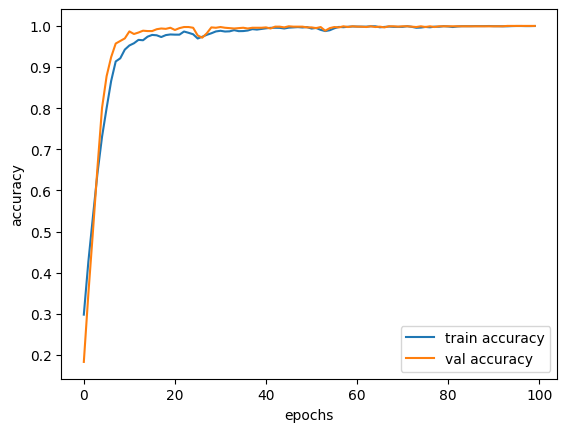

In [39]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

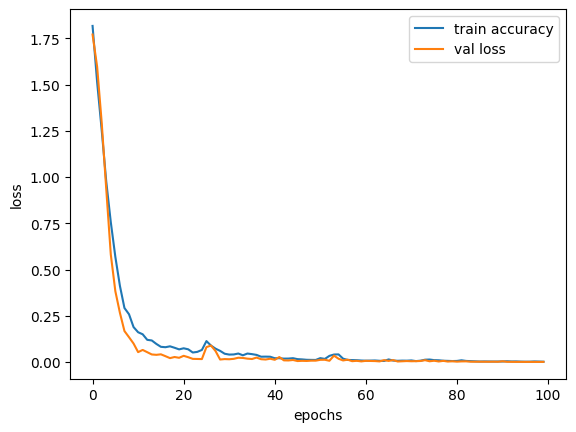

In [30]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train accuracy')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [46]:

sample_path = r'C:\Users\chand\Downloads\TESS\TESS\slide 3 dmt.wav'


sample_features = extract_mfcc(sample_path)


sample_features = np.expand_dims(sample_features, axis=0)  
sample_features = np.expand_dims(sample_features, axis=-1)  

predicted_probabilities = model.predict(sample_features)
predicted_emotion = enc.inverse_transform(predicted_probabilities)  

print("Predicted Emotion:", predicted_emotion[0])
Audio(sample_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Emotion: ['happy']
